<a href="https://colab.research.google.com/github/tkshmichihiro/ml_titanic/blob/master/Titanic_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas
import numpy
import matplotlib
import sklearn

print(pandas.__version__)
print(numpy.__version__)
print(matplotlib.__version__)
print(sklearn.__version__)

#Upload files to Google Colab
from google.colab import files
uploaded = files.upload()



0.24.2
1.16.3
3.0.3
0.20.3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

,CV Scores
Support Vector Machine,0.830561
Logistec Regression,0.813739
Random Forest,0.789057


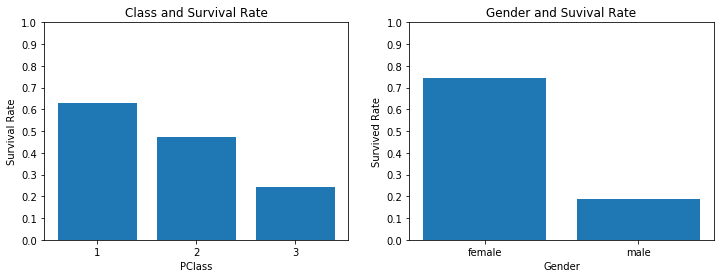

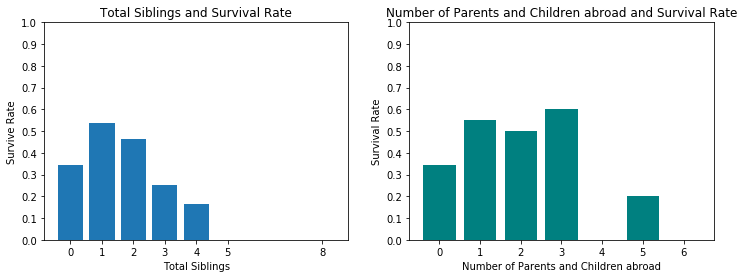

In [17]:
#Data processing library
import pandas as pd
import numpy as np

#Data visualize library
import matplotlib.pyplot as plt

#Machine learing library
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')



fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#Survival rate for PClass
PClassPlot = train_set['Survived'].groupby(train_set['Pclass']).mean()
ax1.bar(x=PClassPlot.index, height=PClassPlot.values)
ax1.set_ylabel('Survival Rate')
ax1.set_xlabel('PClass')
ax1.set_xticks(PClassPlot.index)
ax1.set_yticks(np.arange(0,1.1,.1))
ax1.set_title("Class and Survival Rate")

#Survival rate for sex
GenderPlot = train_set['Survived'].groupby(train_set['Sex']).mean()
ax2.bar(x=GenderPlot.index, height=GenderPlot.values)
ax2.set_ylabel('Survived Rate')
ax2.set_xlabel('Gender')
ax2.set_xticks(GenderPlot.index)
ax2.set_yticks(np.arange(0,1.1,.1))
ax2.set_title('Gender and Suvival Rate')

fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

#SibSp (num of sibline and num of Spouse)
SiblingPlot = train_set['Survived'].groupby(train_set['SibSp']).mean()
ax1.bar(x=SiblingPlot.index, height=SiblingPlot.values)
ax1.set_ylabel('Survive Rate')
ax1.set_xlabel('Total Siblings')
ax1.set_xticks(SiblingPlot.index)
ax1.set_yticks(np.arange(0,1.1,.1))
ax1.set_title('Total Siblings and Survival Rate')

#Parch (num of parents/childlen)
ParchPlot = train_set['Survived'].groupby(train_set['Parch']).mean()
ax2.bar(x=ParchPlot.index, height=ParchPlot.values, width = .8, color='Teal')
ax2.set_ylabel('Survival Rate')
ax2.set_xlabel('Number of Parents and Children abroad')
ax2.set_xticks(ParchPlot.index)
ax2.set_yticks(np.arange(0,1.1,.1))
ax2.set_title('Number of Parents and Children abroad and Survival Rate')


train_set['Age'].fillna(train_set['Age'].median(), inplace=True)
train_set['Embarked'].fillna('C', inplace=True)
labelencoder=LabelEncoder()
train_set['Sex'] = labelencoder.fit_transform(train_set['Sex'])
train_set.isnull().sum()
train_set['Sex'].head()

#Embarked (Departed port) Transfar it to a dummy valuable
Embarked = pd.get_dummies(train_set['Embarked'], drop_first=True)
#Embarked.colums = ['Embarked-Q', 'Embarked-S']

#PClass (Customer Cluss) Transfar it to a dummiy valuable
Pclass = pd.get_dummies(train_set['Pclass'], drop_first=True)
#Pclass.colums = ['PClass2', 'PClass3']

#Check Embarked
#Embarked.head()

#Split the Aage into 4 classes
train_set['Age_Cat'] = pd.qcut(train_set['Age'],4)
AgePlot = train_set['Survived'].groupby(train_set['Age_Cat']).mean()
AgePlot

#Split the fare into 6 classes
train_set['Fare_Cat'] = pd.qcut(train_set['Fare'], 6)
FarePlot = train_set['Survived'].groupby(train_set['Fare_Cat']).mean()
FarePlot

#SibSP and Parch total
train_set['Total Family'] = train_set['SibSp'] + train_set['Parch']
FamilyPlot = train_set['Survived'].groupby(train_set['Total Family']).mean()
FamilyPlot

#See if the customer is alone or not
train_set['Alone'] = np.where(train_set['Total Family']==0,1,0)
AlonePlot = train_set['Survived'].groupby(train_set['Alone']).mean()
AlonePlot

#Get honoric from the name
train_set['Title'] = train_set.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)
train_set['Title'].unique()

Mr = ['Mr']
Crew1 = ['Don', 'Rev', 'Capt']
Crew2 = ['Major', 'Col', 'Dr']
Women_Masters = ['Mrs', 'Miss', 'Master']
Affluence = ['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'the Countess', 'Jonkheer']

train_set['Title_Group'] = np.where(train_set['Title'] == Mr[0], 'Mr', 'Affluence')
train_set['Title_Group'] = np.where(train_set['Title'].isin(Crew1), 'Crew1',train_set['Title_Group'])
train_set['Title_Group'] = np.where(train_set['Title'].isin(Crew2), 'Crew2', train_set['Title_Group'])
train_set['Title_Group'] = np.where(train_set['Title'].isin(Women_Masters), 'Women_Masters', train_set['Title_Group'])
train_set['Title_Group'] = np.where(train_set['Title'].isin(Affluence), 'Affluence', train_set['Title_Group'])

TitlePlot = train_set['Survived'].groupby(train_set['Title_Group']).mean()
TitlePlot

train_set['Age_Cat'] = pd.qcut(train_set['Age'],4,labels = ['Age Group 1', 'Age Group 2', 'Age Group 3', 'Age Group 4'])
train_set['Fare_Cat'] = pd.qcut(train_set['Fare'],6,labels = ['Fare Group 1', 'Fare Group 2', 'Fare Group 3', 'Fare Group 4','Fare Group 5', 'Fare Group 6'])

Age = pd.get_dummies(train_set['Age_Cat'], drop_first=True)
Fare = pd.get_dummies(train_set['Fare_Cat'], drop_first=True)
Title_Groups = pd.get_dummies(train_set['Title_Group'], drop_first=True)

train_set = pd.concat([train_set, Pclass, Embarked, Age, Fare,Title_Groups], axis=1)

#Put all the data to train_set
train_set = train_set.drop(columns = ['PassengerId', 'Pclass', 'Name', 'Embarked', 'Fare', 'Ticket', 'Cabin', 'Age', 'Age_Cat', 'Fare_Cat', 'Title', 'Title_Group'])

train_set.columns

x_train = train_set.drop(columns='Survived')
y_train = train_set['Survived']

### test set pre operation

#fill the lacked info
test_set['Age'].fillna(test_set['Age'].median(), inplace=True)
test_set['Fare'].fillna(test_set['Fare'].median(), inplace=True)

#Set Sex value as a numerical value
test_set['Sex'] = labelencoder.fit_transform(test_set['Sex'])

#PClass and Embarked into dummy value
test_Pclass = pd.get_dummies(test_set['Pclass'], drop_first=True)
test_Embarked = pd.get_dummies(test_set['Embarked'], drop_first=True)

# Feature recognition
test_set['Age_Cat'] = pd.qcut(test_set['Age'],4)
Age_cat = pd.get_dummies(test_set['Age_Cat'], drop_first=True)
#Age_cat.colmuns = ['Age Group 2', 'Age Group 3' , 'Age Group 4']
test_set['Fare_Cat'] = pd.qcut(test_set['Fare'], 6)
Fare_cat = pd.get_dummies(test_set['Fare_Cat'], drop_first=True)
#Fare_cat.columns = ['Fare Group 2', 'Fare Group 3', 'Fare Group 4', 'Fare Group 5' ,'Fare Group 6']
test_set['Total Family'] = test_set['SibSp'] + test_set['Parch']
test_set['Alone'] = np.where(test_set['Total Family']==0, 1 ,0)
test_set['Title'] = test_set.Name.str.extract(r',\s*([^\.]*)\s*\.', expand=False)

test_set['Title_Group'] = np.where(test_set['Title'] == Mr[0], 'Mr', 'Affluence')
test_set['Title_Group'] = np.where(test_set['Title'].isin(Crew1), 'Crew1',test_set['Title_Group'])
test_set['Title_Group'] = np.where(test_set['Title'].isin(Crew2), 'Crew2', test_set['Title_Group'])
test_set['Title_Group'] = np.where(test_set['Title'].isin(Women_Masters), 'Women_Masters', test_set['Title_Group'])
test_set['Title_Group'] = np.where(test_set['Title'].isin(Affluence), 'Affluence', test_set['Title_Group'])

Title_Groups_test = pd.get_dummies(test_set['Title_Group'], drop_first=True)

test_set = pd.concat([test_set, test_Pclass, test_Embarked, Age_cat, Fare_cat,Title_Groups_test], axis=1)
PassengerID = test_set['PassengerId']
test_set = test_set.drop(columns = ['Fare', 'Fare_Cat', 'Age_Cat', 'Age', 'Name', 'Pclass', 'Ticket', 'Cabin', 'PassengerId', 'Embarked', 'Title_Group', 'Title'])

LR = LogisticRegression()
RF = RandomForestClassifier()
SVM = SVC()

scores = []
modelnames = ['Logistec Regression', 'Random Forest', 'Support Vector Machine']
models = [LR,RF,SVM]

for i in models:
  score = cross_val_score(i, x_train, y_train, scoring = 'accuracy' , cv = 5).mean()
  scores.append(score)


pd.DataFrame(scores, index=modelnames,columns=['CV Scores']).sort_values(by = 'CV Scores', ascending=False)

#RF.fit(x_train, y_train)
#y_pred = RF.predict(test_set)

#my_solution = pd.DataFrame({'PassengerId':PassengerID, 'Survived':y_pred})
#my_solution = my_solution.set_index('PassengerId')
#my_solution.to_csv('submit.csv')


In [0]:
train_set['Sex'].head()


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64